In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import os


In [95]:
#os.chdir('Users/juliasebastiano/Documents/techproject')
os.getcwd()
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#df_train

In [96]:
train.info() #get info on 81 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [97]:
train['SalePrice'].describe()  #get basic stats on SalePrice variable

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [98]:
train.isna().sum() #see where the null values are in the data

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

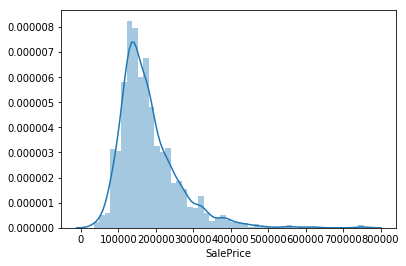

In [99]:
sns.distplot(train['SalePrice'])

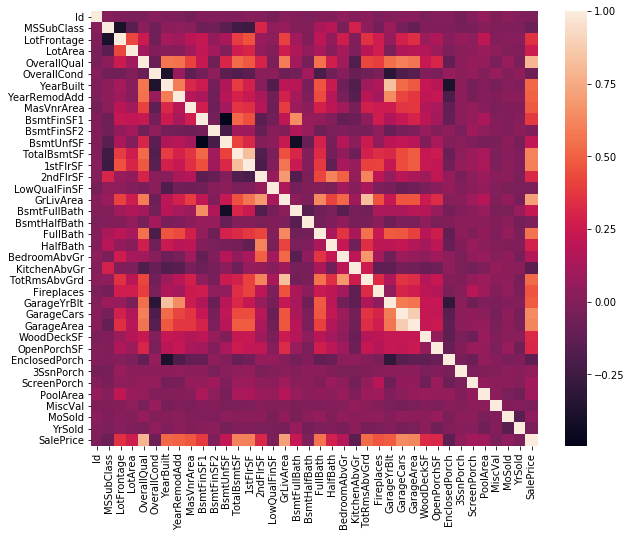

In [100]:
f, ax = plt.subplots(figsize=(10, 8)) #create our heatmap
sns.heatmap(train.corr());

In [101]:
#drop ID column since we dont need it
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

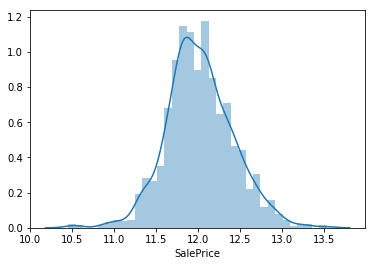

In [102]:
#deal with skew in SalePrice
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice']) #see if its more normally distributed now

In [146]:
#now store SalePrice seperately
train["naivemodel"] = train["SalePrice"].mean()
SalePrice = train["SalePrice"]
#combine datasets
traintest = pd.concat((train, test)).reset_index(drop=True)
NaiveModel = train["naivemodel"]

/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [104]:
#now we deal with null values
#competition says null just means none, such as having no pool or alley, so we fill with 'None'
traintest["PoolQC"] = traintest["PoolQC"].fillna("None")
traintest["Alley"] = traintest["Alley"].fillna("None")
traintest["MiscFeature"] = traintest["MiscFeature"].fillna("None")
traintest["FireplaceQu"] = traintest["FireplaceQu"].fillna("None")
traintest["Fence"] = traintest["Fence"].fillna("None")

for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    traintest[column] = traintest[column].fillna('None')

#replace nulls for Garage values with 0 since it means no garage
for column in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    traintest[column] = traintest[column].fillna(0)

#replaces these nulls too since it means no basement
for column in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    traintest[column] = traintest[column].fillna('None')


In [105]:
traintest['MSZoning'].value_counts()
#most common value (mode) is 'RL', which we'll use for filling null values


RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [106]:
#fill this with the mode
traintest['MSZoning'] = traintest['MSZoning'].fillna(traintest['MSZoning'].mode()[0])

In [107]:
#we will also replace nulls with the mode for these columns since theyre categorical
for column in ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    traintest[column] = traintest[column].fillna(traintest[column].mode()[0])

In [108]:
#see where we're at with missing values
missingvals = traintest.isnull().sum().sort_values(ascending=False)
missingvals

SalePrice        1459
LotFrontage       486
MasVnrType         24
MasVnrArea         23
Utilities           2
BsmtHalfBath        2
BsmtFullBath        2
Functional          2
BsmtUnfSF           1
BsmtFinSF1          1
BsmtFinSF2          1
TotalBsmtSF         1
Foundation          0
FullBath            0
ExterCond           0
Fireplaces          0
FireplaceQu         0
GarageArea          0
GarageCars          0
Fence               0
Exterior2nd         0
GarageCond          0
Exterior1st         0
ExterQual           0
GarageFinish        0
YrSold              0
Condition1          0
EnclosedPorch       0
Electrical          0
Condition2          0
                 ... 
PoolArea            0
PoolQC              0
RoofMatl            0
RoofStyle           0
SaleCondition       0
SaleType            0
ScreenPorch         0
Street              0
TotRmsAbvGrd        0
WoodDeckSF          0
YearBuilt           0
Neighborhood        0
MoSold              0
MiscVal             0
LandContou

In [109]:
#whoops, forgot to drop SalePrice so we'll do that now
traintest.drop(['SalePrice'], axis=1, inplace=True)

#fill Basement stuff with 0 since it just means no basement
for column in ('BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF'):
    traintest[column] = traintest[column].fillna(0)
    
#descriptions says for Functional, NA means 'Typ' so we fill with that
traintest["Functional"] = traintest["Functional"].fillna("Typ")

In [110]:
traintest['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [112]:
#dropping the Utilities column since its the same value except for 1 column
#this means it wont be useful for our analysis anyways
traintest.drop(['Utilities'], axis=1, inplace=True)

In [114]:
traintest["LotFrontage"].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [116]:
#Lot Frontage mean and median are close so I'll replace nulls with the mean
traintest['LotFrontage'] = traintest['LotFrontage'].fillna(traintest['LotFrontage'].mean())

In [118]:
#for the masonry, no type means no masonry so replace that with None and area with 0
traintest["MasVnrType"] = traintest["MasVnrType"].fillna("None")
traintest["MasVnrArea"] = traintest["MasVnrArea"].fillna(0)

In [119]:
#now lets see if all null values are dealt with
missingvals = traintest.isnull().sum().sort_values(ascending=False)
missingvals

YrSold           0
Foundation       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
FullBath         0
Electrical       0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
EnclosedPorch    0
Condition2       0
YearRemodAdd     0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF2       0
                ..
RoofMatl         0
SaleCondition    0
Heating          0
SaleType         0
ScreenPorch      0
Street           0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
Neighborhood     0
MoSold           0
MiscVal          0
MiscFeature      0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotConfig   

In [120]:
#now all the null values are dealt with, there are other things to do
#some values are numerical but should be categorical, so we will fix that by turning them to strings
traintest['MSSubClass'] = traintest['MSSubClass'].apply(str)
traintest['YrSold'] = traintest['YrSold'].astype(str)
traintest['MoSold'] = traintest['MoSold'].astype(str)
traintest['OverallCond'] = traintest['OverallCond'].astype(str)


In [127]:
#create feature for total SF of house
traintest['TotalSF'] = traintest['TotalBsmtSF'] + traintest['1stFlrSF'] + traintest['2ndFlrSF']
TotalSF

0       2566.0
1       2524.0
2       2706.0
3       2473.0
4       3343.0
5       2158.0
6       3380.0
7       3197.0
8       2726.0
9       2068.0
10      2080.0
11      3499.0
12      1824.0
13      2988.0
14      2506.0
15      1686.0
16      2008.0
17      1296.0
18      2228.0
19      2368.0
20      3534.0
21      1745.0
22      3572.0
23      2100.0
24      2120.0
25      3166.0
26      1800.0
27      3408.0
28      3084.0
29      1040.0
         ...  
2889    1282.0
2890    2605.0
2891     729.0
2892    2056.0
2893    1152.0
2894    3351.0
2895    3240.0
2896    3250.0
2897    3328.0
2898    2982.0
2899    2338.0
2900    3282.0
2901    2784.0
2902    3688.0
2903    3676.0
2904    1600.0
2905    2656.0
2906    1568.0
2907    1738.0
2908    3304.0
2909    1260.0
2910    1638.0
2911    2464.0
2912    1638.0
2913    1638.0
2914    1638.0
2915    1638.0
2916    2448.0
2917    1882.0
2918    2996.0
Length: 2919, dtype: float64

In [128]:
#categorical features need to be encoded, make dummies
traintest = pd.get_dummies(traintest)

In [131]:
#split into test and train
modelingtrain = traintest[:train.shape[0]]
modelingtest = traintest[train.shape[0]:]

In [141]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lasso = Lasso()
param = {'alpha': [100,10,1,0.1,0.01,0.001]}
lasso_regressor = GridSearchCV(lasso, param)
lasso_regressor.fit(modelingtrain, SalePrice)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

model_lasso = Lasso(alpha=0.001)

def rmsle_cv(model): #credit to Vijay Gupta on Kaggle for this
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(modelingtrain.values)
    rmse= np.sqrt(-cross_val_score(model_lasso, modelingtrain.values, SalePrice, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

score = rmsle_cv(model_lasso)
print(score.mean())


/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: Co

{'alpha': 0.001}
0.8703515004317142


/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: 

0.13886038683742902


/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [147]:
score = rmsle_cv(model_lasso)
print(score.mean())
#RMSE of .1389, that's not that bad

/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: 

0.13886038683742902


/Users/juliasebastiano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
